# 1. Importing Libraries

In [335]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import f
from sklearn.preprocessing import LabelEncoder
import copy


# 2. Reading data as a dataframe

In [336]:
df=pd.read_csv(r'C:\Users\Kushagra\Documents\Great Learning\Week 6 Project\insurance (2).csv') #Reading the data

# 3. EDA

## 3.a. Shape of the Data

In [337]:
print('Shape of the Data is:{}'.format(df.shape)) #Studying the shape of the dataset

Shape of the Data is:(1338, 7)


## 3.b. Data Types of each attribute

In [338]:
print('Data type of each attributes is:\n{}'.format(df.dtypes)) #Identifying the datatype of each attribute

Data type of each attributes is:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## 3.c. Checking the presence of missing values

In [339]:
print(df.isnull().values.any()) #Checking for Missing values
print('There are no missing values')

False
There are no missing values


## 3.d. 5 point summary of numerical attributes

In [340]:
df.describe() #5 point summary of numerical attributes

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3.e Distribution of 'bmi','age' and 'charges' columns

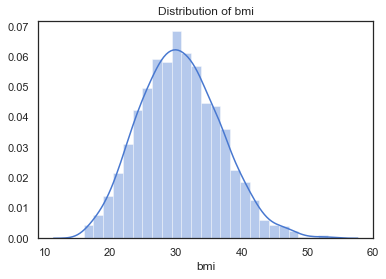

In [341]:
sns.distplot(df['bmi']).set_title('Distribution of bmi') #Plotting to analyse the distribution of BMI column
plt.show()

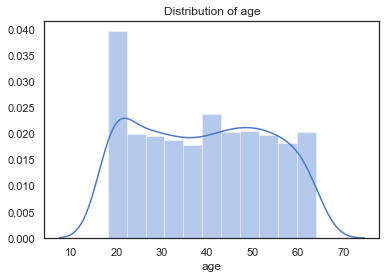

In [342]:
sns.distplot(df['age']).set_title('Distribution of age') #Plotting to analyse the distribution of age column
plt.show()

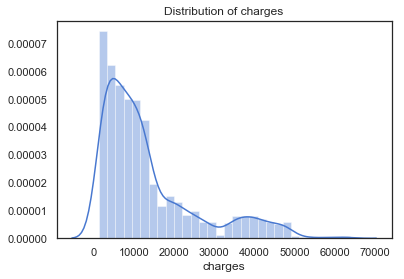

In [343]:
sns.distplot(df['charges']).set_title('Distribution of charges') #Plotting to analyse the distribution of charges column
plt.show()

## 3.f. Measure of Skewness

In [344]:
bmi_skew=df['bmi'].skew()
print('Skewness of bmi column is {}'.format(bmi_skew)) #Skewness of BMI Column
age_skew=df['age'].skew()
print('Skewness of age column is {}'.format(age_skew)) #Skewness of Age Column
charges_skew=df['charges'].skew()
print('Skewness of charges column is {}'.format(charges_skew)) #Skewness of Charges Column

Skewness of bmi column is 0.2840471105987448
Skewness of age column is 0.05567251565299186
Skewness of charges column is 1.5158796580240388


## 3.g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

There are outliers present in bmi column.


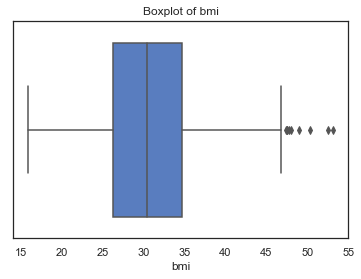

In [345]:
sns.boxplot(df['bmi']).set_title('Boxplot of bmi') #We plot Boxplots in the next three cells to identify the presence of outliers
print('There are outliers present in bmi column.')
plt.show()

There are no outliers present in age column.


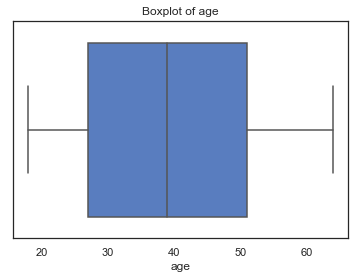

In [346]:
sns.boxplot(df['age']).set_title('Boxplot of age')
print('There are no outliers present in age column.')


There are outliers present in charges column.


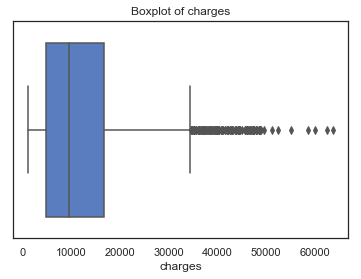

In [347]:
sns.boxplot(df['charges']).set_title('Boxplot of charges') 
print('There are outliers present in charges column.')

## 3.h. Distribution of categorical columns (include children)

Text(0.5, 1.0, 'Distribution of sex')

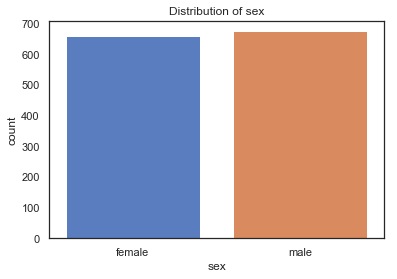

In [348]:
sns.countplot(df['sex']).set_title('Distribution of sex') #Distribution on the basis of Sex

Text(0.5, 1.0, 'Distribution of children')

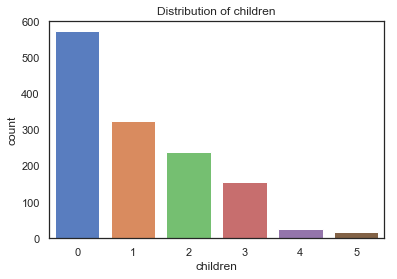

In [349]:
sns.countplot(df['children']).set_title('Distribution of children') #Distribution on the basis of number of children

Text(0.5, 1.0, 'Distribution of smokers')

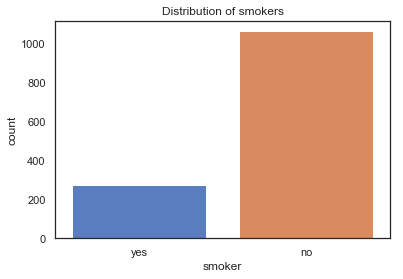

In [350]:
sns.countplot(df['smoker']).set_title('Distribution of smokers') #Distribution of Smokers and Non-smokers

Text(0.5, 1.0, 'Distribution of regions')

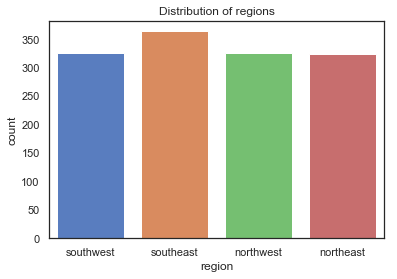

In [351]:
sns.countplot(df['region']).set_title('Distribution of regions') #Distribution Region-Wise

## 3.i. Pair plot that includes all the columns of the data frame 

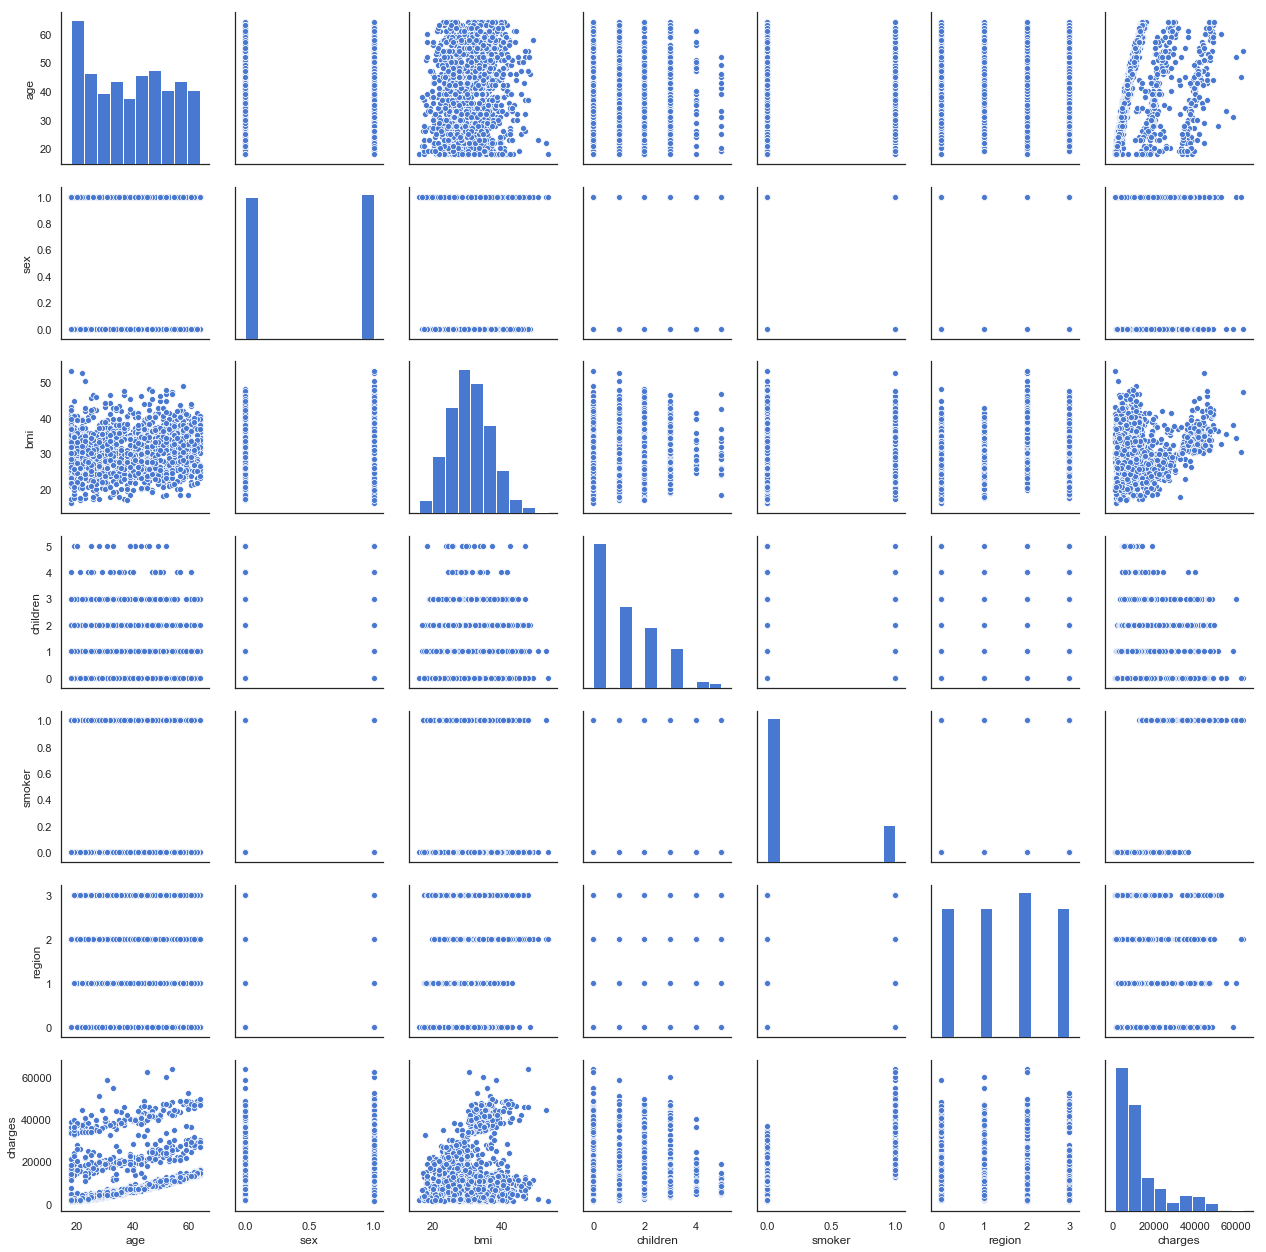

In [352]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
#To represent all the columns, we encoded the nominal attributes
sns.pairplot(df_encoded)
plt.show()

# 4. Answer the following questions with statistical evidence
## a. Do charges of people who smoke differ significantly from the people who don't? 

In [353]:
df_smoker=df[df['smoker']=='yes']
df_notsmoker=df[df['smoker']=='no']
smoker=df_smoker['charges']
nonsmoker=df_notsmoker['charges']

In [354]:
Ho="Charges of smoker and non smoker are same" #Null Hypothesis
Ha="Charges of smoker and non smoker are not same" #Alternative Hypothesis
t_statistic,p_value=ttest_ind(smoker,nonsmoker)
print(t_statistic,p_value)


46.664921172723716 8.271435842177219e-283


In [355]:
print(f'{Ha} as the p_value is less than 0.05.\nCharges of smokers and non smokers differ significantly.\nWe reject the Null Hypothesis') 
#We set the significance level at 5%


Charges of smoker and non smoker are not same as the p_value is less than 0.05.
Charges of smokers and non smokers differ significantly.
We reject the Null Hypothesis


## b. Does bmi of males differ significantly from that of females? 

In [356]:
df_male=df[df['sex']=='male']
df_female=df[df['sex']=='female']
male=df_male['bmi']
female=df_female['bmi']

In [357]:
Ho1='BMI of Males and Females are same' #Null Hypothesis
Ha1='BMI of Males and Females are not same' #Alternative Hypothesis
t_statistic1,p_value1=ttest_ind(male,female)
print(t_statistic1,p_value1)

1.696752635752224 0.08997637178984932


In [358]:
print(f'{Ho1} as the p_value is more than 0.05.\nBMI does not differ significantly and is identical.\nWe fail to reject the Null Hypothesis.')
#We set the significance level to be 5%

BMI of Males and Females are same as the p_value is more than 0.05.
BMI does not differ significantly and is identical.
We fail to reject the Null Hypothesis.


## c. Is the proportion of smokers significantly different in different genders? 


In [359]:
# Chi_square test to check if smoking habits are different for different genders
Ho5 = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha5 = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha5} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho5} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [360]:
print('The proportion of smokers differ significantly in different genders.\nWe reject the Null Hypothesis')

The proportion of smokers differ significantly in different genders.
We reject the Null Hypothesis


## d. Is the distribution of bmi across women with no children, one child and two children, the same?
### We will use ANOVA test for this. For ANOVA test, we need to check these assumptions:
#### 1. All populations involved follow a normal distribution
#### 2. All popoulations have similar variance
#### 3. The samples are randomly selected and independent of one another
### We will check these assumptions below.

In [361]:
df_female_o=df_female[df_female['children']==0] #Female with no kids
df_female_1=df_female[df_female['children']==1] #Female with a kid
df_female_2=df_female[df_female['children']==2] #Female with 2 kids

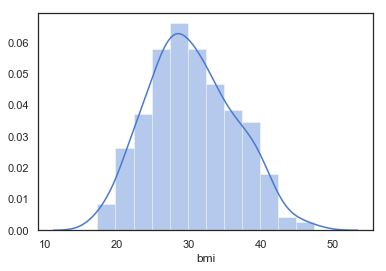

In [362]:
#Analysing whether the categories have a normal distribution or not.
sns.distplot(df_female_o['bmi'])

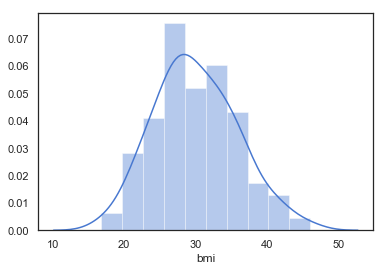

In [363]:
sns.distplot(df_female_1['bmi'])

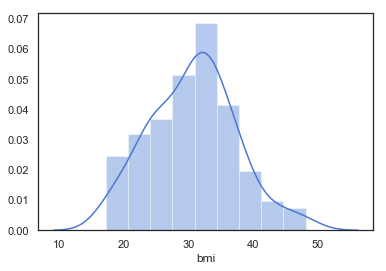

In [364]:
sns.distplot(df_female_2['bmi'])

In [365]:
#Analysing the variances
print('Variance of females with 2 children={}'.format(df_female_2['bmi'].var()))
print('Variance of females with 1 children={}'.format(df_female_1['bmi'].var()))
print('Variance of females with 0 children={}'.format(df_female_o['bmi'].var()))
print('The variance is similar for all the three categories')

Variance of females with 2 children=43.93303448938898
Variance of females with 1 children=33.48741358945416
Variance of females with 0 children=35.60430409758265
The variance is similar for all the three categories


In [366]:
Ho7 = "No. of children has no effect on bmi"   #Null Hypothesis
Ha7 = "No. of children has an effect on bmi"   #Alternative Hypthesis
f_stat6,p_value6=stats.f_oneway(df_female_o['bmi'],df_female_1['bmi'],df_female_2['bmi'])
if p_value6 < 0.05:  # Setting our significance level at 5%
    print(f'{Ha7} as the p_value ({p_value6.round(3)}) < 0.05')
else:
    print(f'{Ho7} as the p_value ({p_value6.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


In [367]:
print('Distribution of BMI is same.')

Distribution of BMI is same.
